# Hello Pandas [<img src="http://mybinder.org/badge.svg" align="right">](http://mybinder.org/repo/matr01/jupyter-hello?filepath=hello-pandas.ipynb)

inspired by https://gitlab.com/jan.kolomaznik/pydata

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
mesta = (pd.read_html("https://cs.wikipedia.org/wiki/Seznam_m%C4%9Bst_v_%C4%8Cesku_podle_po%C4%8Dtu_obyvatel")
         [0] # Data jsou v prvni tabulce
         .drop(columns=["Obrázek", "#"])
         .set_index("Článek"))
mesta['Počet obyvatel'] = mesta['Počet obyvatel'].str.replace(r"\s", "").astype(int)
mesta

,Počet obyvatel,Rozloha (km2),Okres
Článek,,,
Praha,1324277,49621,Praha
Brno,381346,23018,okres Brno-město
Ostrava,287968,21423,okres Ostrava-město
Plzeň,174842,13767,okres Plzeň-město
Liberec,104802,10609,okres Liberec
...,...,...,...
Janov,284,1103,okres Bruntál
Boží Dar,250,3791,okres Karlovy Vary
Rejštejn,247,3043,okres Klatovy


<AxesSubplot:xlabel='Článek'>

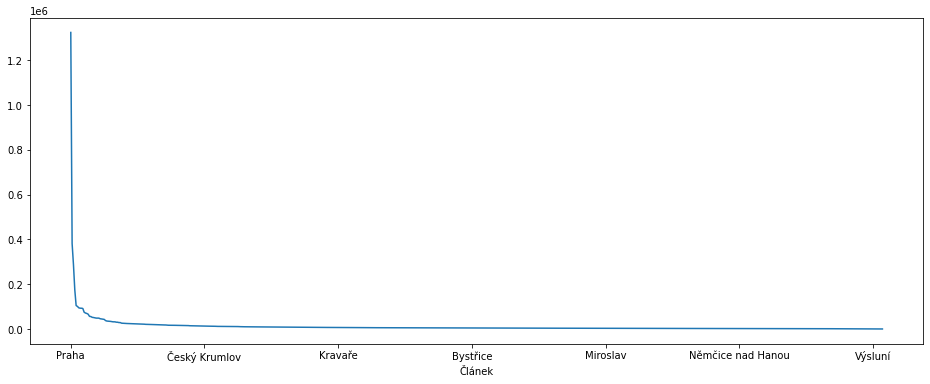

In [10]:
mesta['Počet obyvatel'].plot(figsize=(16,6))